<a href="https://colab.research.google.com/github/DariNGplus/cd_202202_hernando_duran/blob/main/Taller_Funci%C3%B3n_K.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **La Función K de Ripley**
La función K, propuesta por Brian D. Ripley en 1976, representa la media observada del número de puntos dentro de una distancia definida dividida por la densidad de puntos en el área de estudio.

La forma general de la función K está dada por la ecuación:

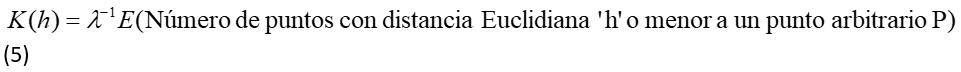

Donde λ es la densidad de puntos en el área. El valor de la función K para un fenómeno aleatoriamente distribuido es igual a πh^2.

Para estimar el valor de la función K se parte del valor estimado de E, denominado operador de expectación, que para espacios planos se estima mediante la ecuación:

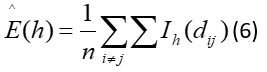

Donde h es la distancia máxima entre los puntos a ser tomada en consideración, n es el número total de puntos, dij es la distancia euclidiana entre dos puntos i y j, Ih() es una función de peso con valor uno (1) cuando la distancia entre los puntos es menor o igual a h y valor cero (0) cuando esta distancia es superior a h y R es el área del espacio estudiado. La densidad de puntos λ se puede estimar como:

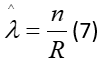

Al remplazar las funciones (6) y (7) sobre la función (5) se obtiene el estimador de la función K para espacios planos dado por la ecuación:

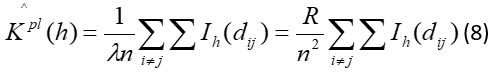

La siguiente figura muestra las distancias dij menores o iguales a h para dos puntos arbitrarios dentro del área de estudio.

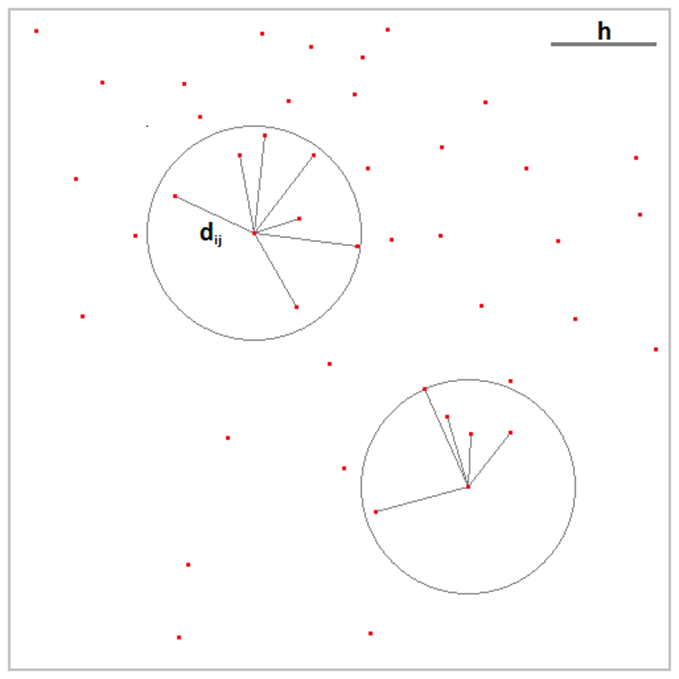

La función K puede ser utilizada para determinar si una serie de puntos ubicados sobre un espacio tienden a formar grupos o por el contrario se distribuye de forma aleatoria; una forma de poner a prueba estas afirmaciones es por medio de simulaciones de Monte Carlo. Para esto se genera una gran cantidad de conjuntos aleatorios de puntos sobre el mismo espacio (por ejemplo 1.000 conjuntos), la función K se aplica con diferentes valores de h (distancia máxima entre puntos a tenerse en cuenta) sobre cada uno de los conjuntos de datos aleatorios generados y sobre el conjunto original de puntos. Con los resultados de la función K sobre los conjuntos aleatorios para cada valor de h se definen intervalos de confianza, por ejemplo del 95% (entre el valor que ocupa el percentil 2,5 y el valor que ocupa el percentil 97,5), si el valor de la función K para el conjunto de datos original es superior al intervalo de confianza definido se puede concluir que existe tendencia estadísticamente significativa a formar agrupaciones y por lo tanto la distribución de los datos sobre el espacio no es aleatoria.

In [1]:
pip install pyproj

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 6.3 MB 5.2 MB/s 


In [2]:
import pandas as pd
import pyproj

In [3]:
ruta = 'https://foscalinternacional.com/datasets/eventos_dengue_2020.csv'
df = pd.read_csv(ruta)
df

,ID,fec_not,semana,año,edad_,uni_med_,sexo_,cod_pais_o,cod_dpto_o,cod_mun_o,...,hipotension,hepatomegalia,hemorragia_mucosa,hipotermia,caida_plaquetas,acum_liquido,aum_hematocrito,conducta,latitud,longitud
0,1,17/01/2020,1,2020,25,1,F,170,68,276,...,2,2,2,2,2,2,2,1. Ambulatorio,7.076011,-73.102501
1,2,10/01/2020,1,2020,24,1,M,170,68,276,...,2,2,2,2,2,2,2,1. Ambulatorio,7.079495,-73.105400
2,3,12/01/2020,1,2020,58,1,M,170,68,276,...,2,2,2,2,2,2,2,1. Ambulatorio,7.090290,-73.091003
3,4,12/01/2020,1,2020,29,1,F,170,68,276,...,2,2,2,2,2,2,2,1. Ambulatorio,7.067435,-73.090958
4,5,10/01/2020,1,2020,56,1,F,170,68,276,...,2,2,2,2,1,2,2,2. Hospitalizacion piso,7.066905,-73.104980
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1257,1258,7/03/2020,9,2020,36,1,F,170,68,276,...,2,2,1,2,2,2,2,1. Ambulatorio,7.072610,-73.099487
1258,1259,13/03/2020,9,2020,42,1,M,170,68,276,...,2,2,2,2,1,2,1,2. Hospitalizacion piso,7.065252,-73.103607
1259,1260,8/03/2020,9,2020,2,1,M,170,68,276,...,2,2,2,2,2,2,2,1. Ambulatorio,7.091391,-73.103264
1260,1261,11/03/2020,9,2020,12,1,F,170,68,276,...,2,2,2,2,2,2,2,1. Ambulatorio,7.061083,-73.097000


In [4]:
#Creación de la proyección
P = pyproj.Proj(proj='utm', zone=18, ellps='WGS84', preserve_units=True)

In [5]:
#Se convertirán las coordenadas geográficas a UTM
df['x'], df['y'] = P(df['longitud'], df['latitud'])
df

,ID,fec_not,semana,año,edad_,uni_med_,sexo_,cod_pais_o,cod_dpto_o,cod_mun_o,...,hemorragia_mucosa,hipotermia,caida_plaquetas,acum_liquido,aum_hematocrito,conducta,latitud,longitud,x,y
0,1,17/01/2020,1,2020,25,1,F,170,68,276,...,2,2,2,2,2,1. Ambulatorio,7.076011,-73.102501,709584.027559,782579.281866
1,2,10/01/2020,1,2020,24,1,M,170,68,276,...,2,2,2,2,2,1. Ambulatorio,7.079495,-73.105400,709262.121378,782963.354103
2,3,12/01/2020,1,2020,58,1,M,170,68,276,...,2,2,2,2,2,1. Ambulatorio,7.090290,-73.091003,710847.924654,784163.825097
3,4,12/01/2020,1,2020,29,1,F,170,68,276,...,2,2,2,2,2,1. Ambulatorio,7.067435,-73.090958,710863.366771,781635.895608
4,5,10/01/2020,1,2020,56,1,F,170,68,276,...,2,2,1,2,2,2. Hospitalizacion piso,7.066905,-73.104980,709314.159319,781570.969374
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1257,1258,7/03/2020,9,2020,36,1,F,170,68,276,...,1,2,2,2,2,1. Ambulatorio,7.072610,-73.099487,709918.546763,782204.438977
1258,1259,13/03/2020,9,2020,42,1,M,170,68,276,...,2,2,1,2,1,2. Hospitalizacion piso,7.065252,-73.103607,709466.644754,781388.734012
1259,1260,8/03/2020,9,2020,2,1,M,170,68,276,...,2,2,2,2,2,1. Ambulatorio,7.091391,-73.103264,709492.782783,784279.996264
1260,1261,11/03/2020,9,2020,12,1,F,170,68,276,...,2,2,2,2,2,1. Ambulatorio,7.061083,-73.097000,710198.574916,780930.648555


In [6]:
#Función K de Ripley
h = 100


In [7]:
!pip install cartopy
!pip uninstall shapely
!pip install shapely --no-binary shapely


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 10.8 MB 5.2 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... error
     |████████████████████████████████| 10.8 MB 24.4 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... error
     |████████████████████████████████| 10.8 MB 41.8 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... error
     |████████████████████████████████| 10.8 MB 29.2 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... error
     |████████████████████████████████| 12.1 MB 28.4 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 46 kB 3.8 MB/s 
  Created wheel for cartopy: filename=Cartopy-0.19.0.post1-cp37-cp37m

In [8]:

import matplotlib.pyplot as plt
import urllib.request
import cartopy
import cartopy.crs as ccrs                   # for projections
import cartopy.io.shapereader as shapereader

url = 'https://foscal.net/cartografia/'

file_list = ["68276_urbano.cpg", "68276_urbano.dbf", "68276_urbano.prj", "68276_urbano.qmd", "68276_urbano.shp", "68276_urbano.shx"]

for file in file_list:
    urllib.request.urlretrieve(url+file, file)


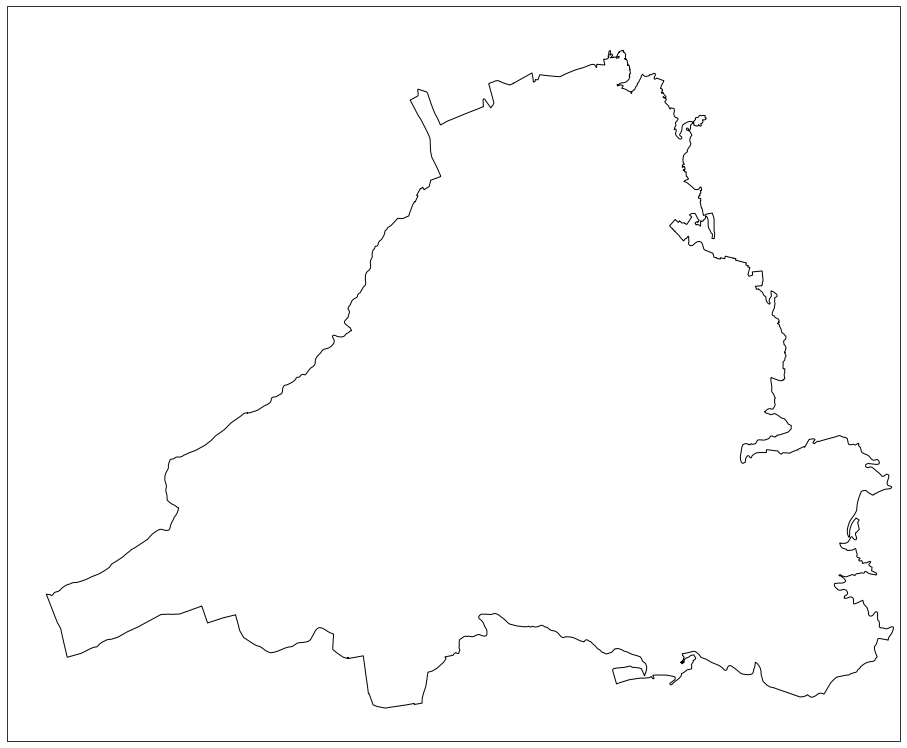

In [9]:
subplot_kw = dict(projection=ccrs.PlateCarree())

fig, ax = plt.subplots(figsize=(16, 16), subplot_kw=subplot_kw)

# Mapa de floridablanca
lower_lon = -73.135
upper_lon = -73.073
lower_lat = 7.051
upper_lat = 7.102

ax.set_extent([lower_lon, upper_lon, lower_lat, upper_lat])

reader = shapereader.Reader('68276_urbano')
mapPoly = ""

for manzana in reader.geometries():
    ax.add_geometries([manzana], ccrs.PlateCarree(), facecolor='white', edgecolor='black')
    mapPoly = manzana

ax.add_line
plt.show()

In [10]:
from pyproj import Geod

geod = Geod(ellps="WGS84")


area = abs(geod.geometry_area_perimeter(mapPoly)[0])

print(area)

17025105.500815365


In [38]:
import math
import random
from shapely.geometry import Point
import numpy as np


def distancia(x1, x2, y1, y2):
  return math.sqrt((x1-x2)**2 + (y1 - y2)**2)

def pointProximity(pointList, h):
  cont = 0
  pointIndex = 0 

  for pointOne in pointList:
    if (pointIndex + 1 >= len(pointList)):
      break
    for pointTwo in pointList[pointIndex + 1:len(pointList)]:
      if (distancia(pointOne[0], pointTwo[0], pointOne[1], pointTwo[1]) <=h):
        cont+=1
    pointIndex +=1
  
  return cont

def pointGeneration(pointNumber, polygon):
  puntosList = []
  
  for a in range(pointNumber):
    x=0
    y=0
    while (polygon.contains(Point(x, y)) == False):
      x = random.uniform(lower_lon, upper_lon)
      y = random.uniform(lower_lat, upper_lat)
      (X, Y) = P(x, y)
    puntosList.append([X, Y])
  return puntosList
 

def valorK (puntos, area, h):
  return (area/(len(puntos)**2)) * pointProximity(puntos, h)

def kCompleto(pointList, h):
  result = []
  originalK = valorK(pointList[0], area, h)
  result.append(originalK)

  for randSet in pointList[1: len(pointList)]:
    result.append(valorK(randSet, area, h))
  result.sort()
  return [h, originalK, np.percentile(result, 2.5), np.percentile(result, 97.5)]

In [12]:
x_points = df['x']
y_points = df['y']

pointList = []

for index in range (len(x_points)):
  pointList.append([x_points[index], y_points[index]])

print(valorK(pointList, area, 100))
  

42524.173438787024


In [28]:
dataset = []

dataset.append(pointList)

for i in range(9):
  a = pointGeneration(1200, mapPoly)
  dataset.append(a)

In [32]:
print(dataset[0])
print(dataset[9])

[[709584.0275587427, 782579.2818662707], [709262.1213779906, 782963.3541030388], [710847.924653984, 784163.8250970178], [710863.3667708042, 781635.8956080116], [709314.1593193136, 781570.9693740582], [711096.7140779058, 782293.1266040616], [711052.8042788485, 783131.2863650891], [711408.7994419443, 783480.0083182668], [709603.4818185298, 783389.2144418821], [710093.7016408446, 781632.3757321138], [709771.0127364886, 784268.2127199352], [710956.6936339295, 781079.7940812898], [711047.8266384689, 783726.4112028747], [712357.4408202394, 781376.1685096117], [711063.1702097501, 782250.003661983], [710098.1753699761, 782394.0954730926], [711149.0904027692, 781034.6446568139], [710964.5561927627, 782245.4320014897], [710251.3528654021, 782866.7118568583], [710420.8573511399, 781616.9943213376], [711595.6481706088, 781300.7716980064], [709898.5813290776, 783788.043650311], [710446.8307622165, 784123.621923976], [709272.2566263253, 782752.0059490838], [709634.6268680101, 784224.9335509024], [71

In [41]:
result = []

for h in range(10, 210, 10):
 result.append(kCompleto(dataset, h))

result

[[10, 2127.277655685927, 88.08127498685728, 1701.8436378466422],
 [20, 4361.453686029438, 462.5744810551397, 3545.057316211965],
 [30, 6948.394352742978, 1196.7821557778022, 5744.1289425336345],
 [40, 10337.0728293884, 2322.626371968874, 8617.75082624256],
 [50, 14687.83667795208, 3573.7942814298367, 12362.016991709748],
 [60, 19402.055000351545, 5164.2820019139945, 16366.678992523654],
 [70, 24853.872107888346, 7136.06114767683, 21070.668343075107],
 [80, 30466.03677741152, 9237.302033185448, 25936.169472449033],
 [90, 36153.030309195005, 11734.02193189009, 30939.468152109774],
 [100, 42524.173438787024, 14521.29180815205, 36536.826915700185],
 [110, 49429.80844166697, 17856.852842469783, 42593.639817575284],
 [120, 56613.379218656635, 21090.44058863159, 48892.45467173043],
 [130, 64235.23333174239, 24973.406056760265, 55605.42394792612],
 [140, 73182.6272905822, 28851.346754168208, 63436.13247755428],
 [150, 82033.81271223018, 32986.73305732633, 71266.76422742485],
 [160, 91665.35626

In [43]:
dfResult = pd.DataFrame(result, columns=['h', 'K Original', '2.5', '97.5'])
dfResult

,h,K Original,2.5,97.5
0,10,2127.277656,88.081275,1701.843638
1,20,4361.453686,462.574481,3545.057316
2,30,6948.394353,1196.782156,5744.128943
3,40,10337.072829,2322.626372,8617.750826
4,50,14687.836678,3573.794281,12362.016992
5,60,19402.055000,5164.282002,16366.678993
6,70,24853.872108,7136.061148,21070.668343
7,80,30466.036777,9237.302033,25936.169472
8,90,36153.030309,11734.021932,30939.468152
9,100,42524.173439,14521.291808,36536.826916


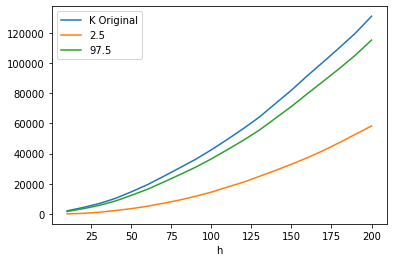

In [44]:
dfResult.plot(x="h", y=["K Original", "2.5", "97.5"])
plt.show()